In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('hotel_bookings.csv')
pd.set_option('display.max_columns', None)

### Análise ADR (Average Daily Rate)

> A análise será feita sobre os clientes que de fato chegaram nos hotéis.

In [3]:
df_not_canceled = df.loc[df['is_canceled'] == 0, :]

- Com relação ao número de crianças:

In [4]:
df_not_canceled[['country', 'adr']].sort_values('adr', ascending= False)[0:10]

,country,adr
111403,ITA,510.00
15083,PRT,508.00
103912,PRT,451.50
39155,PRT,426.25
39568,ESP,402.00
39118,MAR,397.38
39517,PRT,392.00
39543,ESP,388.00
39177,ESP,387.00
39960,PRT,383.00


In [5]:
group_country = pd.DataFrame(df_not_canceled.groupby('country')['adr'].agg([np.sum, np.mean, np.median])).reset_index()
group_country.head()

,country,sum,mean,median
0,ABW,256.68,128.340000,128.34
1,AGO,17592.89,112.056624,105.00
2,AIA,265.00,265.000000,265.00
3,ALB,790.24,79.024000,77.10
4,AND,590.00,295.000000,295.00


In [6]:
country = ['PRT', 'FRA', 'GBR', 'ESP', 'DEU', 'ITA', 'IRL', 'BEL', 'USA', 'NLD']
means = []

for i in country:
    mean_temp = group_country.loc[group_country['country'] == i, 'mean'].to_list()[0]
    round(mean_temp, 2)
    means.append(mean_temp)
    
df_country_mean_adr = pd.DataFrame({'mean': means, 'country':country})
df_country_mean_adr 

,mean,country
0,90.342738,PRT
1,105.750599,FRA
2,90.467804,GBR
3,110.304402,ESP
4,101.259214,DEU
5,110.760123,ITA
6,94.690995,IRL
7,111.477709,BEL
8,118.976667,USA
9,105.010518,NLD


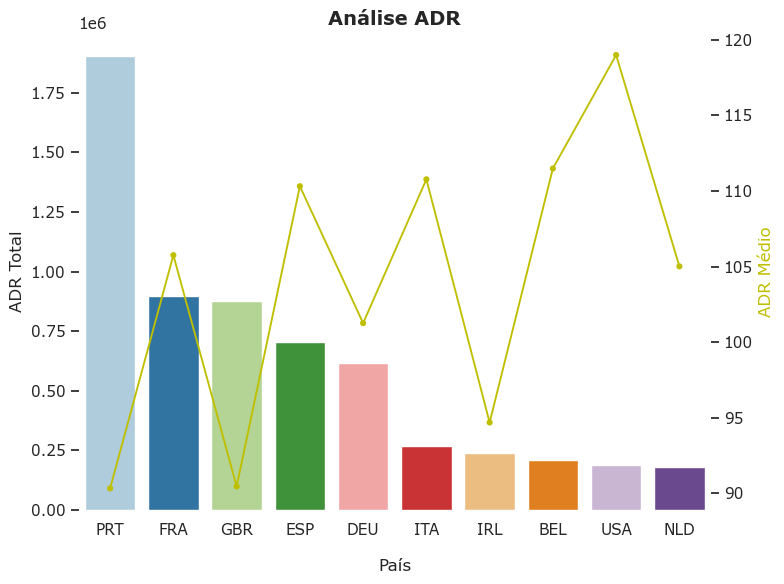

In [7]:
sns.set_theme(style= 'white', font= 'verdana', font_scale= 1, palette= 'Paired')
plt.figure(figsize= (8,6))

ax = sns.barplot(x= group_country.loc[:, ['country', 'sum']].sort_values('sum', ascending= False)[0:10]['country'],
            y= group_country.loc[:, ['country', 'sum']].sort_values('sum', ascending= False)[0:10]['sum'])
ax.set_title('Análise ADR', fontweight= 'bold', fontsize= 14)
ax.set_ylabel('ADR Total')
ax.set_xlabel('')
ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
ax.set_xlabel('País', labelpad= 15, fontsize= 12)

ax2 = ax.twinx()
ax2 = sns.pointplot(x= df_country_mean_adr['country'], y= df_country_mean_adr['mean'], color= 'y', scale= 0.5)
ax2.set_ylabel('ADR Médio', color= 'y')
ax2.spines[['top', 'right', 'left', 'bottom']].set_visible(False)


plt.tight_layout()

- Como se é esperado, os países que mais deram renda aos hotéis foram aqueles que possuíram maior quantidade de hóspedes (vistos anteriormente). 

    Houve apenas pequenas alterações na ordem do primeiro gráfico com relação ao gráfico anterior de número de hóspedes: Apesar de mais hóspedes serem oriundos do Reino Unido do que da França, esses deram mais renda do que aqueles. O mesmo se observou entre: Irlanda/Itália e Estados Unidos/Holanda. Contudo, nesses dois casos a diferença de hospedagem era muito pequena, diferentemente do primeiro caso, onde a diferença era um pouco mais significativa. 


In [8]:
df.groupby('is_repeated_guest')['is_canceled'].mean().mul(100).round(2)

is_repeated_guest
0    37.79
1    14.49
Name: is_canceled, dtype: float64

In [9]:
df_not_canceled.groupby('is_repeated_guest')['adr'].mean()

is_repeated_guest
0    101.670375
1     62.848877
Name: adr, dtype: float64

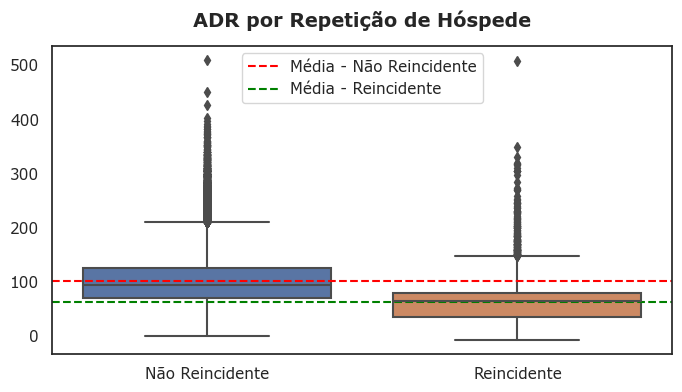

In [10]:
sns.set_theme(style= 'white', font= 'verdana', font_scale= 1)

plt.figure(figsize= (8,4))

ax = sns.boxplot(x= df_not_canceled['is_repeated_guest'], y= df_not_canceled['adr'])
ax.set_title('ADR por Repetição de Hóspede', fontweight= 'bold', pad= 14, fontsize= 14)
ax.set_xticks([0,1])
ax.set_xticklabels(['Não Reincidente', 'Reincidente'])
ax.set_xlabel('')
ax.set_ylabel('')
ax.axhline(df_not_canceled.groupby('is_repeated_guest')['adr'].mean()[0], 
             color= 'red', linestyle= 'dashed', label= 'Média - Não Reincidente')
ax.axhline(df_not_canceled.groupby('is_repeated_guest')['adr'].mean()[1],
             color= 'green', linestyle= 'dashed', label= 'Média - Reincidente')
plt.legend(loc= 'best')

- Olhando as médias percebe-se que se o hóspede não for repetido ele poderá ter maior tendência a gastar mais. 
- A distribuição dos hóspedes repetidos é assimétrica negativa, indicando de fato uma maior quantidade de gastos inferiores.

In [11]:
df.groupby('children')['is_canceled'].mean().mul(100).round(2)

children
0.0      37.09
1.0      32.24
2.0      42.20
3.0      22.37
10.0    100.00
Name: is_canceled, dtype: float64

In [12]:
df.groupby('adults')['is_canceled'].mean().mul(100).round(2)

adults
0      27.05
1      28.98
2      39.32
3      34.68
4      25.81
5     100.00
6     100.00
10    100.00
20    100.00
26    100.00
27    100.00
40    100.00
50    100.00
55    100.00
Name: is_canceled, dtype: float64

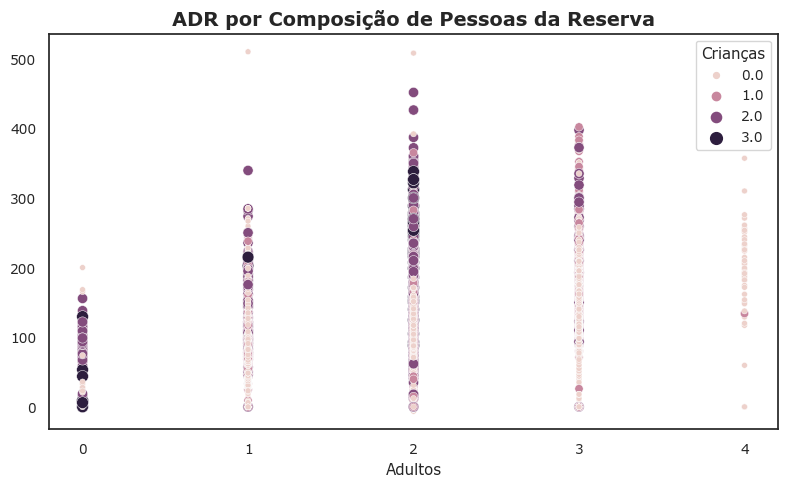

In [14]:
#A quantidade de bebês foi desconsiderada na análise pois é muito pequena e demonstrou uma correlação bem menor se 
#comparado com adultos e crianças. 

sns.set_theme(style= 'white', font= 'verdana', font_scale= 0.9)
plt.figure(figsize= (8,5))

ax = sns.scatterplot(x= df_not_canceled['adults'], y= df_not_canceled['adr'], hue= df_not_canceled['children'],
            size= df_not_canceled['children'])
ax.set_title('ADR por Composição de Pessoas da Reserva', fontweight= 'bold', fontsize= 14)
ax.set_xlabel('Adultos')
ax.set_xticks(np.arange(0,5,1))
ax.set_ylabel('')

plt.legend(title= 'Crianças')

plt.tight_layout()

- Como se é esperado, quanto maior a quantidade de pessoas que compõem a reserva, maior a tendência de que o ADR seja maior.

### Análise do Processo de Reserva

In [22]:
df_canceled = df.loc[df['is_canceled'] == 1, :]

In [23]:
df['assigned_room_type'].value_counts()

A    74053
D    25322
E     7806
F     3751
G     2553
C     2375
B     2163
H      712
I      363
K      279
P       12
L        1
Name: assigned_room_type, dtype: int64

In [24]:
df['reserved_room_type'].value_counts()

A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64

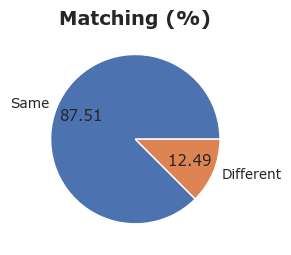

In [25]:
df['matching_room_type'] = df['reserved_room_type'].where(df['reserved_room_type'] == df['assigned_room_type'], 'Different')
df['matching_room_type'] = df['matching_room_type'].where(df['matching_room_type'] == 'Different', 'Same')

plt.figure(figsize=(3,4))
ax = plt.pie(df['matching_room_type'].value_counts(normalize= True).mul(100).round(2), 
               labels= df['matching_room_type'].value_counts(normalize= True).mul(100).round(2).index, 
               autopct='%.2f', pctdistance= 0.7)
plt.title('Matching (%)', fontweight= 'bold', fontsize= 14)

plt.tight_layout()

In [26]:
print('Taxa de Cancelamento:', round(df[df['matching_room_type'] == 'Different']['is_canceled'].mean()*100, 2), '- Different')
print('Taxa de Cancelamento:', round(df[df['matching_room_type'] == 'Same']['is_canceled'].mean()*100, 2),'- Same')

Taxa de Cancelamento: 5.38 - Different
Taxa de Cancelamento: 41.56 - Same


In [27]:
df_room = df[df['matching_room_type'] == 'Same']['reserved_room_type'].value_counts(normalize= True).mul(100).round(2).reset_index()
df_room

,index,reserved_room_type
0,A,70.45
1,D,16.98
2,E,5.67
3,F,2.59
4,G,1.95
5,B,0.95
6,C,0.85
7,H,0.56
8,P,0.01
9,L,0.00


- Percebe-se que a grande maioria (**87,51%**) dos quartos que foram designados para a reserva, **de fato foram os quartos reservados**. Bom **indicativo de que não há overbooking muito elevado** ou algum erro no processamento das reservas.  

- Em um primeiro momento é de se imaginar que a atribuição da reserva diferentemente do que foi escolhido anteriormente poderia ser um fator que implicasse diretamente na quantidade de cancelamentos. Contudo, de acordo com a taxa (5.38% entre os que não deram matching e 41.56% para o outro grupo) essa situação não parece ser um indicativo forte de motivação para o cancelamento.

- Percebe-se que a imensa maioria (**70,45%**) dos clientes **preferem um tipo específico de quarto**. 

In [28]:
df['deposit_type'].value_counts(normalize= True).mul(100).round(2)

No Deposit    87.65
Non Refund    12.22
Refundable     0.14
Name: deposit_type, dtype: float64

In [29]:
df['booking_changes'].value_counts(normalize= True).mul(100).round(3)

0     84.860
1     10.638
2      3.187
3      0.776
4      0.315
5      0.099
6      0.053
7      0.026
8      0.014
9      0.007
10     0.005
13     0.004
14     0.004
15     0.003
16     0.002
17     0.002
12     0.002
11     0.002
20     0.001
21     0.001
18     0.001
Name: booking_changes, dtype: float64

In [30]:
df.groupby('is_canceled')['booking_changes'].mean().mul(100).round(2)

is_canceled
0    29.34
1     9.83
Name: booking_changes, dtype: float64

In [31]:
df.groupby('deposit_type')['is_canceled'].mean().mul(100).round(2)

deposit_type
No Deposit    28.38
Non Refund    99.36
Refundable    22.22
Name: is_canceled, dtype: float64

In [32]:
df.groupby('deposit_type')['booking_changes'].sum()

deposit_type
No Deposit    26122
Non Refund      182
Refundable       96
Name: booking_changes, dtype: int64

In [33]:
round(df.groupby('deposit_type')['booking_changes'].sum() / df['deposit_type'].value_counts(), 3)*100

deposit_type
No Deposit    25.0
Non Refund     1.2
Refundable    59.3
dtype: float64

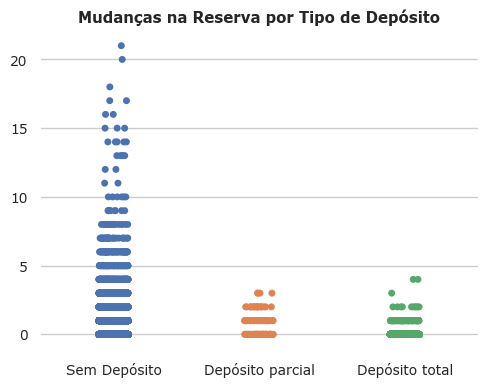

In [34]:
sns.set_theme(style= 'whitegrid', font= 'verdana', font_scale= 0.9)
plt.figure(figsize= (5,4))

ax = sns.stripplot(x= df['deposit_type'], y= df['booking_changes'])
ax.set_title("Mudanças na Reserva por Tipo de Depósito", fontweight= 'bold')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticks([0,1,2])
ax.set_xticklabels(['Sem Depósito', 'Depósito parcial', 'Depósito total'])
ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)

plt.tight_layout()

- A **grande maioria** (**84,86%**) dos clientes **não realizaram alterações** prévias nas reservas. Apenas uma alteração foi de 10,64% e duas alterações foi de 3,19%. Ou seja, quase a totalidade dos clientes (**98,69%**) **chegam a fazer no máximo até duas alterações** prévias na reserva. Fator positivo para os hotéis pois permite maior capacidade de gerenciamento e programação das reservas. 
- A **grande maioria** dos clientes preferiram realizar suas reservas **sem depósito** (**87,65%**). Depósito parcial foi de 12,22% e o total de 0,14%.
- **É possível** que o **tipo de depósito** feito pelo cliente influencie na **quantidade de alterações prévias** feitas nas reservas. Cerca de **59%** dos clientes que realizaram **depósito parcial fizeram alterações** na reserva. Em uma amostra muito maior, apenas cerca de **25%** dos clientes que  **não realizaram depósito fizeram alterações** na reserva. 
- A quantidade de clientes que fizeram depósito total foi irrisória assim como sua taxa de alterações prévias nas reservas. 

In [35]:
df['days_in_waiting_list'].value_counts(normalize= True).mul(100).round(3)

0      96.903
39      0.190
58      0.137
44      0.118
31      0.106
        ...  
116     0.001
109     0.001
37      0.001
89      0.001
36      0.001
Name: days_in_waiting_list, Length: 128, dtype: float64

In [36]:
df_not_waited = df[df['days_in_waiting_list'] == 0]
df_not_waited['is_canceled'].value_counts(normalize= True).mul(100).round(3)

0    63.813
1    36.187
Name: is_canceled, dtype: float64

In [37]:
not_waited_frame = df_not_waited['is_canceled'].value_counts(normalize= True).mul(100).round(3)\
                .to_frame().reset_index().rename(columns= {'index':'is_canceled', 'is_canceled':'cancellation'})
not_waited_frame

,is_canceled,cancellation
0,0,63.813
1,1,36.187


In [38]:
df_waited = df[df['days_in_waiting_list'] != 0]
df_waited['is_canceled'].value_counts(normalize= True).mul(100).round(3)

1    63.791
0    36.209
Name: is_canceled, dtype: float64

In [39]:
waited_frame = df_waited['is_canceled'].value_counts(normalize= True).mul(100).round(3)\
                .to_frame().reset_index().rename(columns= {'index':'is_canceled', 'is_canceled':'cancellation'})
waited_frame

,is_canceled,cancellation
0,1,63.791
1,0,36.209


In [40]:
df_wait_total = pd.concat([waited_frame, not_waited_frame], axis= 0)
df_wait_total['hue'] = ['Lista de Espera',  'Lista de Espera', 'Sem Lista de Espera', 'Sem Lista de Espera']
df_wait_total

,is_canceled,cancellation,hue
0,1,63.791,Lista de Espera
1,0,36.209,Lista de Espera
0,0,63.813,Sem Lista de Espera
1,1,36.187,Sem Lista de Espera


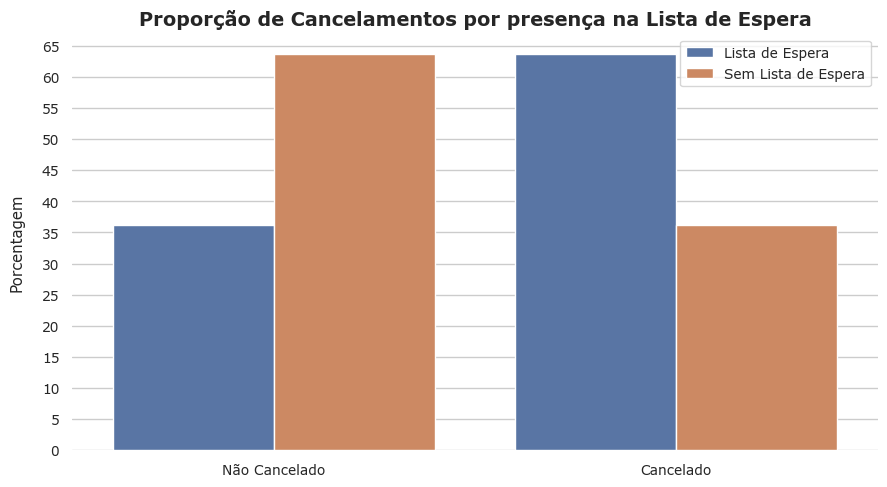

In [41]:
sns.set_theme(style= 'whitegrid', font= 'verdana', font_scale= 0.9)
plt.figure(figsize= (9,5))

ax = sns.barplot(x= df_wait_total['is_canceled'], y= df_wait_total['cancellation'], hue= df_wait_total['hue'])
ax.set_title('Proporção de Cancelamentos por presença na Lista de Espera', fontweight= 'bold', fontsize= 14)
ax.set_xticks([0,1])
ax.set_xticklabels(['Não Cancelado', 'Cancelado'])
ax.set_xlabel('')
ax.set_ylabel('Porcentagem', labelpad= 12)
ax.set_yticks(np.arange(0,70,5))
ax.spines[['top', 'left', 'right', 'bottom']].set_visible(False)
plt.legend(title= '')

plt.tight_layout()

In [42]:
print(round(df_not_waited['required_car_parking_spaces'].mean(), 2))
print(round(df_not_waited['total_of_special_requests'].mean(), 2))

print(round(df_waited['required_car_parking_spaces'].mean(), 2))
print(round(df_waited['total_of_special_requests'].mean(), 2))

0.06
0.59
0.01
0.07


In [43]:
df_waited['total_people'] = df_waited['adults'] + df_waited['children'] + df_waited['babies']
df_not_waited['total_people'] = df_not_waited['adults'] + df_not_waited['children'] + df_not_waited['babies']

print(df_waited['total_people'].mean())
print(df_not_waited['total_people'].mean())

1.755813953488372
1.9750190166655142


In [44]:
df_waited['arrival_date_month'].value_counts(normalize= True).mul(100).round(2)

October      14.31
May          13.76
April        12.95
September    12.82
June         11.47
January       8.14
March         7.44
December      6.54
February      5.30
November      4.71
August        1.54
July          1.03
Name: arrival_date_month, dtype: float64

- A imensa maioira (**96,9%**) dos clientes que fizeram suas reservas **não precisaram ficar na lista de espera**. Excelente métrica, mostrando eficiência no processamento das reservas. 

- Conforme visto no gráfico, existe uma boa **possibilidade** de que a **permanência na lista de espera** tenha ajudado a influenciar na **decisão de cancelamento** da reserva. Entre as pessoas que esperaram, a grande maioria (63.79%) cancelou, ao passo que entre os que não esperaram, a grande maioria não cancelou (63,81%). Porcentagens praticamente idênticas para situações diametralmente opostas. 

- Aparentemente, fazer pedidos especiais na reserva dos quartos ou requerer vagas de estacionamento não implicou necessariamente na inclusão na lista de espera. Contudo, é **curioso** notar que os **clientes que de fato fizeram pedidos especiais** ou "mais robustos" estão em muito **maior proporção entre os que não figuraram na lista de espera**. Isso **pode indicar** uma **predileção** dos administradores dos hotéis em priorizar os **clientes "mais robustos"**, que são mais rentáveis para os hotéis.

- A quantidade de pessoas que fizeram parte das reservas aparentemente não foi um fator determinante na inclusão na lista de espera. 1,75 pessoas em média integraram as reservas que figuraram na lista de espera e 1,97 pessoas integraram as reservas que não pertenciam a mesma.

- Das reservas que figuraram na lista de espera, em sua maioria tinham reservas marcadas para meses onde o movimento é muito grande, o que é esperado. Inclusive, o mês que mais recebeu hospedagens (Outubro), também foi o mês que mais teve reservas marcadas que figuraram na lista de espera.

- A quantidade de alterções na reserva **aparentemente** indica que quanto **mais alterações** forem feitas **maior a chance** de que a reserva **não** seja **cancelada**.

- Caso o tipo de depósito seja **sem reembolso**, curiosamente, em quase toda sua totalidade, os clientes **tenderam a cancelar as reservas**. 